Introduction
--
The stock market is a market that enables the seamless exchange of buying and selling of company stocks. Every Stock Exchange has its own Stock Index value. The index is the average value that is calculated by combining several stocks. 

This helps in representing the entire stock market and predicting the market’s movement over time. The stock market can have a huge impact on people and the country’s economy as a whole. Therefore, predicting the stock trends in an efficient manner can minimize the risk of loss and maximize profit.


How does stock market work?
--
The concept behind how the stock market works is pretty simple. Operating much like an auction house, the stock market enables buyers and sellers to negotiate prices and make trades.

The stock market works through a network of exchanges — you may have heard of the New York Stock Exchange, Nasdaq or Sensex or the NSE. Companies list shares of their stock on an exchange through a process called an initial public offering or IPO. Investors purchase those shares, which allows the company to raise money to grow its business. Investors can then buy and sell these stocks among themselves, and the exchange tracks the supply and demand of each listed stock.

That supply and demand help determine the price for each security or the levels at which stock market participants — investors and traders — are willing to buy or sell.


How Share Prices Are Set
--
To actually buy shares of a stock on a stock exchange, investors go through brokers — an intermediary trained in the science of stock trading, who can get an investor a stock at a fair price, at a moment’s notice. Investors simply let their broker know what stock they want, how many shares they want, and usually at a general price range. That’s called a “bid” and sets the stage for the execution of a trade. If an investor wants to sell shares of a stock, they tell their broker what stock to sell, how many shares, and at what price level. That process is called an “offer” or “ask price.”

**`Predicting`** how the stock market will perform is one of the **most difficult things to do**. There are so many factors involved in the prediction — physical factors vs. physiological, rational and irrational behavior, etc. All these aspects combine to make share prices volatile and very difficult to predict with a high degree of accuracy.

Understanding the Problem Statement
--

Broadly, stock market analysis is divided into two parts – Fundamental Analysis and Technical Analysis.

**Fundamental Analysis** involves analyzing the company’s future profitability on the basis of its current business environment and financial performance.

**Technical Analysis**, on the other hand, includes reading the charts and using statistical figures to identify the trends in the stock market.

As you might have guessed, our focus will be on the technical analysis part. We’ll be using a dataset from **Quandl** (you can find historical data for various stocks here) and for this particular project, I have used the data for ‘HDFC bank Ltd- BSE’. 

`data source` : https://www.quandl.com/data/BSE/BOM500180-HDFC-Bank-Ltd-EOD-Prices

In [11]:
# doing all required imports
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
#from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np

In [30]:
# load the dataset
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
# data1 = pd.read_csv('C:\Program Files/Python36/suven/Data Anaylsis/Dataset/BSE-BOM500180.csv', index_col='Date', parse_dates=['Date'], date_parser=dateparse)
data = pd.read_csv('C:\Program Files/Python36/suven/Data Anaylsis/Dataset/BSE-BOM500180.csv', index_col='Date', parse_dates=['Date'], date_parser=dateparse).ffill()

In [31]:
# do a little EDA on it
# print(data.head())
# print(data1.head(30))
data.shape

               Open     High      Low    Close      WAP  No. of Shares  \
Date                                                                     
2020-03-05  1154.00  1164.45  1145.00  1151.65  1155.39      1468666.0   
2020-03-04  1179.00  1179.95  1133.30  1148.95  1152.87       421145.0   
2020-03-03  1180.00  1185.70  1168.15  1181.30  1177.64       600004.0   
2020-03-02  1195.00  1200.05  1167.00  1182.15  1184.96       478321.0   
2020-02-28  1179.80  1184.85  1170.10  1177.60  1177.01       298612.0   
2020-02-27  1200.00  1202.50  1181.00  1199.35  1190.55       933802.0   
2020-02-26  1200.00  1204.20  1186.00  1199.65  1192.59       467136.0   
2020-02-25  1210.00  1210.00  1198.00  1200.25  1201.06       119546.0   
2020-02-24  1214.00  1214.00  1200.30  1210.00  1204.83       473035.0   
2020-02-20  1228.00  1228.95  1214.35  1217.30  1221.24       115183.0   
2020-02-19  1216.00  1229.70  1214.10  1226.10  1221.51        92646.0   
2020-02-18  1215.00  1218.00  1204.00 

(5941, 12)

In [14]:
# the HDFC bank data is from inception 1996 to till date.
# lets look for last 5 years
# do slicing for last 5 years
data = data['2020-03-07' : '2015-03-08']
data.shape

(1236, 12)

In [15]:
# see the first 5 records
data.head()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
2020-03-05,1154.0,1164.45,1145.00,1151.65,1155.39,1468666.0,14379.0,1.696888e+09,1138241.0,77.50,19.45,-2.35
2020-03-04,1179.0,1179.95,1133.30,1148.95,1152.87,421145.0,20176.0,4.855255e+08,259533.0,61.63,46.65,-30.05
2020-03-03,1180.0,1185.70,1168.15,1181.30,1177.64,600004.0,22664.0,7.065890e+08,381293.0,63.55,17.55,1.30
2020-03-02,1195.0,1200.05,1167.00,1182.15,1184.96,478321.0,20852.0,5.667909e+08,346466.0,72.43,33.05,-12.85
2020-02-28,1179.8,1184.85,1170.10,1177.60,1177.01,298612.0,13917.0,3.514686e+08,186572.0,62.48,14.75,-2.20


In [16]:
# see the last 5 records
data.tail()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
2015-03-13,1058.0,1063.10,1035.05,1042.85,1043.907256,154113.0,6674.0,160879679.0,60500.0,39.26,28.05,-15.15
2015-03-12,1060.0,1063.25,1051.05,1054.95,1054.629073,168033.0,7833.0,177212487.0,90958.0,54.13,12.20,-5.05
2015-03-11,1052.0,1061.75,1050.25,1056.20,1055.257829,361480.0,9278.0,381454600.0,231915.0,64.16,11.50,4.20
2015-03-10,1065.0,1065.00,1045.10,1052.75,1053.729523,139550.0,6117.0,147047955.0,56482.0,40.47,19.90,-12.25
2015-03-09,1078.8,1078.80,1056.35,1059.15,1063.895330,101338.0,5244.0,107813025.0,25431.0,25.10,22.45,-19.65


There are multiple variables in the dataset – Date, Open, High, Low, **Close**, WAP , No_of_Shares, No_of_Trades and many more. 

The columns Open and Close represent the starting and final price at which the stock is traded on a particular day.

High, Low and WAP represent the maximum, minimum, and Weigthed Average price of the share for the day.

No_of_Shares is the number of shares bought or sold in the day.

We would only be using **`Close`** parameter from the above dataset.

Just in case if you feel to know the relevance of WAP or Spread C_O, then please see these links :

1. WAP or VWAO is the same thing :
https://www.investopedia.com/terms/v/vwap.asp

2. Spread of the Company Stock :
https://www.investopedia.com/trading/basics-of-the-bid-ask-spread/

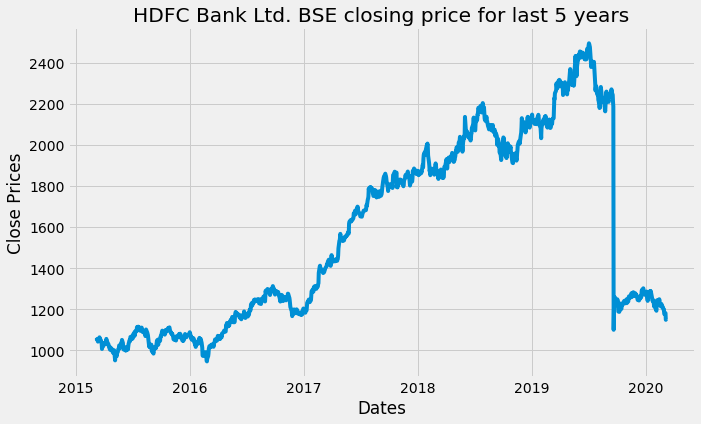

In [17]:
# do some EDA to see the trend in closing prices over last 5 years
# plot close price
# Visualize the per day closing price of the stock.
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(data['Close'])
plt.title('HDFC Bank Ltd. BSE closing price for last 5 years')
plt.show()

Q> Investigate why the rate of HDFC fall so sharply somewhere in beginning of the last quater of 2019? `may be it is due to share split` ??

A> https://www.moneycontrol.com/company-facts/hdfcbank/splits/hdf01

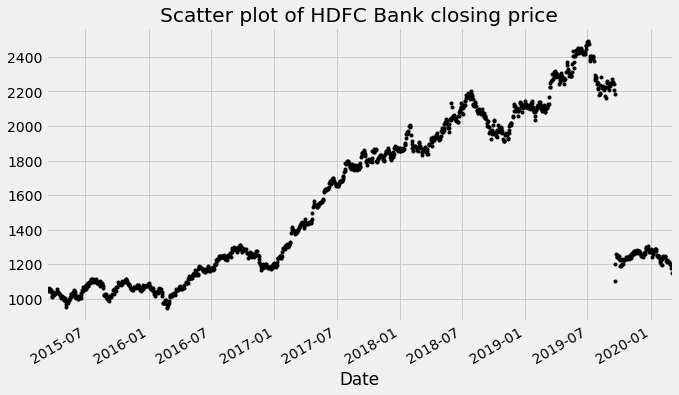

In [18]:
# scatter plot 
df_close = data['Close']
df_close.plot(style='k.')
plt.title('Scatter plot of HDFC Bank closing price')
plt.show();

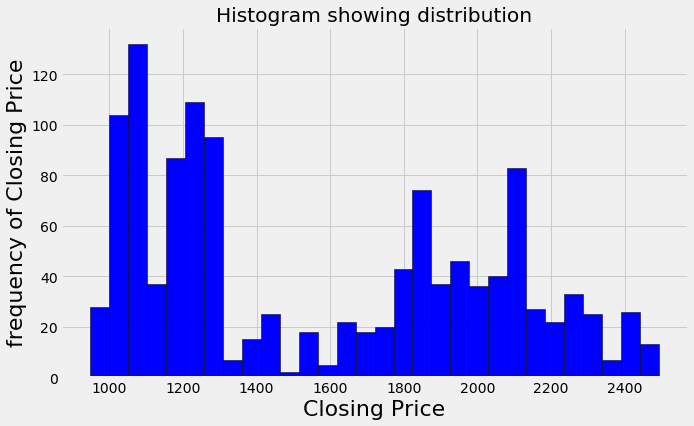

In [19]:
df_close = data['Close']

# Set up the plot
ax = plt.subplot()
    
# Draw the plot
ax.hist(df_close, bins = 30, color = 'blue', edgecolor = 'black')
    
# Title and labels
ax.set_title('Histogram showing distribution')
ax.set_xlabel('Closing Price', size = 22)
ax.set_ylabel('frequency of Closing Price', size= 22);

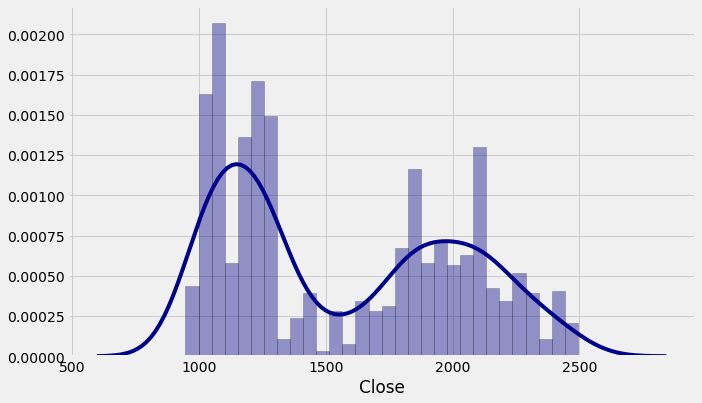

In [20]:
# Density Plot and Histogram of all Closing prices
sns.distplot(df_close, hist=True, kde=True, 
             bins=30, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

# Note : To make density plots in seaborn, 
# we can use either the distplot or kdeplot function.

# how to read this density plot ?
# https://towardsdatascience.com/probability-concepts-explained-probability-distributions-introduction-part-3-4a5db81858dc
# https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e

Machine learning in stock market
--

Stock and financial markets tend to be unpredictable and even illogical, just like the outcome of the US-China Trade War or Election results of some state in India or the lastest US elections - in Nov 2020. 

Due to these characteristics, financial data should be necessarily possessing a rather turbulent structure which often makes it hard to find reliable patterns. Modeling turbulent structures requires machine learning algorithms capable of finding hidden structures within the data and predict how they will affect them in the future. The most efficient methodology to achieve this is Machine Learning and Deep Learning. Deep learning can deal with complex structures easily and extract relationships that further increase the accuracy of the generated results.

Machine learning has the potential to ease the whole process by analyzing large chunks of data, spotting significant patterns and generating a single output that navigates traders towards a particular decision based on predicted asset prices.

**`Note`** : In the NB we are using Time series Forecasting - ARIMA modeling , which also gives good results. We can say it is the second best immediately after **LSTM** ( Long Short Term Memory - a very popular Deep learning Neural Network ) Covered as the last chapter in Advanced ML course. Do see https://datascience.suven.net > Adv ML section > download my e-notes - *No password, don't worry*) 

**`Understand this first`** : 
Stock prices are not randomly generated values instead they can be treated as a discrete-time series model which is based on a set of well-defined numerical data items collected at successive points at regular intervals of time. 

Since it is essential to identify a model to analyze trends of stock prices with adequate information for decision making, it recommends that transforming the time series using ARIMA is a better algorithmic approach than forecasting directly, as it gives more authentic and reliable results.

**Autoregressive Integrated Moving Average (ARIMA) Model** converts non-stationary data to stationary data before working on it. It is one of the most popular models to predict linear time series data.

ARIMA model has been used extensively in the field of finance and economics as it is known to be robust, efficient and has a strong potential for short-term share market prediction.
**`ARIMA modelling is done in depth over the Data Analytics NB_9_A to NB_9_D )`**

From those NB's 9_A to 9_D we very well know that, **First**, we need to check if a series is **stationary or not** because time series analysis only works with stationary data.

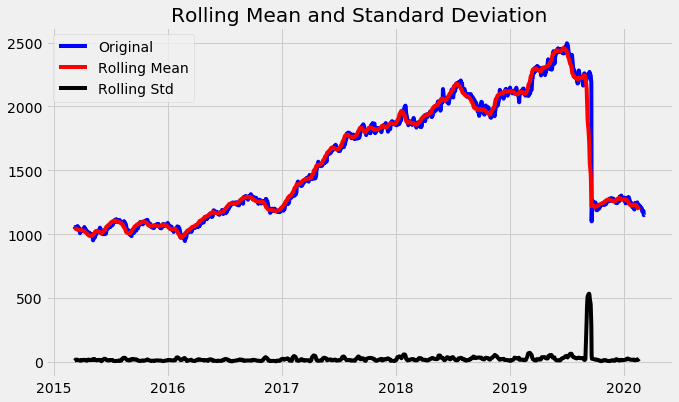

Results of dickey fuller test
Test Statistics                  -1.212573
p-value                           0.668164
No. of lags used                  1.000000
Number of observations used    1234.000000
critical value (1%)              -3.435660
critical value (5%)              -2.863885
critical value (10%)             -2.568019
dtype: float64


In [23]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()#12 stands for 12 months ka mean
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')#
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df_close)

**`Observation`** : Through the above graph, we can see the increasing mean and standard deviation and hence our series is not stationary.

We see that the p-value is greater than 0.05 so we cannot reject the Null hypothesis. Also, the test statistics is greater than the critical values. So the data is **non-stationary.**

`We would some differencing , may be d = 1 or d = 2, which should hopefully make the data series stationary. `

We start by taking a log of the series to reduce the magnitude of the values and reduce the rising trend in the series. Then after getting the log of the series, we find the rolling average of the series. A rolling average is calculated by taking input for the past 12 months and giving a mean consumption value at every point further ahead in series.

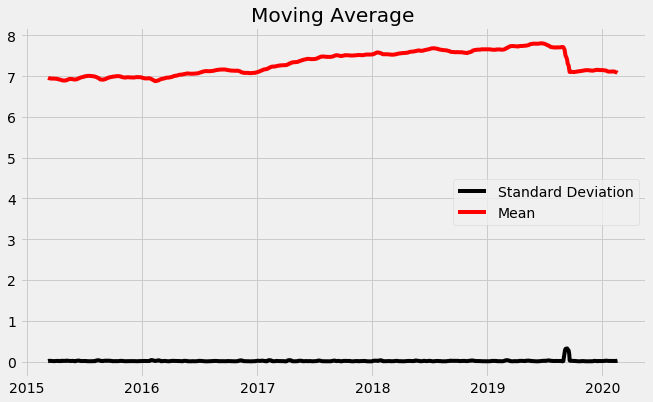

In [24]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()#take 12 months because it is the 2nd highest
std_dev = df_log.rolling(12).std()
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend(loc='best')
plt.legend()
plt.show()

Now we are going to create an ARIMA model and will train it with the closing price of the stock on the train data. So let us split the data into training and test set and visualize it.

In [116]:
# printing a few entries
train_data, test_data = df_log[31:], df_log[:30]
print(train_data.head(10))
print("----------------------------")
print(test_data.head(10))

# please note the dates in the df_close and hence df_log start from current date Jan 2020 upto 2015
# total their are about 1232 records starting from Jan 2020 onwards
# so if you put 
# train_data =  df_log[1:1200] and 
# test_data = df_log[1201:]
# then you are putting latest records for training and older records like those 2015 for testing
# obviously we don't want like this. 
# hence leave latest 30 days for validating the forecast of the ARIMA model

Date
2019-11-29    7.150113
2019-11-28    7.143104
2019-11-27    7.153286
2019-11-26    7.150427
2019-11-25    7.147913
2019-11-22    7.143183
2019-11-21    7.157073
2019-11-20    7.149564
2019-11-19    7.148660
2019-11-18    7.140453
Name: Close, dtype: float64
----------------------------
Date
2020-01-14    7.161971
2020-01-13    7.160263
2020-01-10    7.157112
2020-01-09    7.147402
2020-01-08    7.136523
2020-01-07    7.139541
2020-01-06    7.123794
2020-01-03    7.145275
2020-01-02    7.159797
2020-01-01    7.153873
Name: Close, dtype: float64


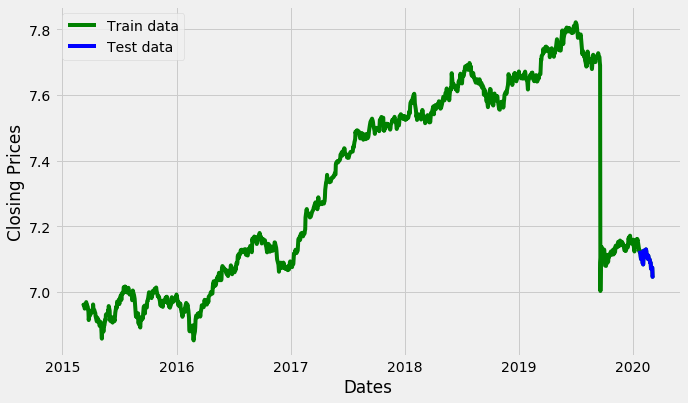

In [33]:
# split data into train and training set
# 1200 rows as trainData and around 30 rows as testData
train_data, test_data = df_log[31:], df_log[:30]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Choose parameters p,q,d for ARIMA model
--
Its time to choose parameters p,q,d for ARIMA model. Last time we chose the value of p,d, and q by observing the plots of ACF and PACF but now we are going to use Auto ARIMA to get the best parameters without even plotting ACF and PACF graphs.

But now we are going to use Auto ARIMA to get the best parameters without even plotting ACF and PACF graphs.

In [35]:
# !pip install pmdarima
from pmdarima.arima import auto_arima
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=-5735.160, BIC=-5724.973, Time=0.402 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=-5741.070, BIC=-5725.790, Time=0.254 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=-5742.018, BIC=-5726.738, Time=0.661 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=-5737.118, BIC=-5732.024, Time=0.258 seconds
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=-5741.764, BIC=-5721.390, Time=0.920 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=-5742.780, BIC=-5722.406, Time=1.236 seconds
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=-5740.866, BIC=-5715.399, Time=0.786 seconds
Fit ARIMA: (0, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=-5741.128, BIC=-5715.661, Time=0.684 seconds
Fit ARIMA: (1, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=-5739.031, BIC=-5708.471, Time=1.748 seconds
Total fit time: 6.986 seconds
                          

**`So the Auto ARIMA model provided the value of p,d, and q as 1,0 and 2 respectively.`**

In [37]:
# the parameters for p,d,q can be found in 2 ways : 
# a. Perform GridSearch -> Refer NB 9_D
# b. auto_arima() -> for this import auto_arima like -> from pmdarima.arima import auto_arima
###  see sample cell above 

model = ARIMA(train_data, order=(0, 1, 2))  
fitted = model.fit(disp=0)  
#print(fitted.summary())

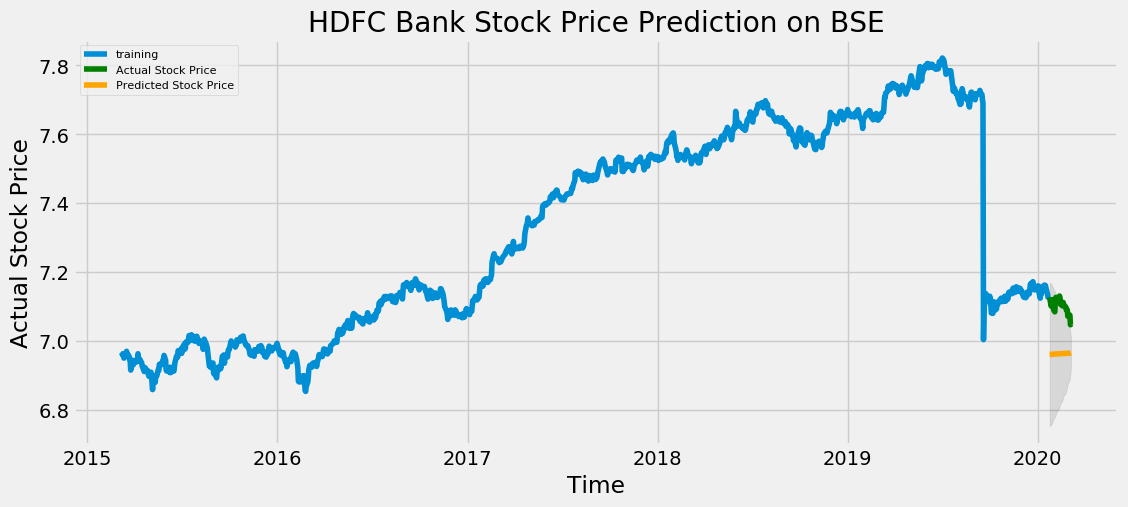

In [38]:
# Now let's start forecast the stock prices on the test dataset keeping 95% confidence level.
# Forecast
fc, se, conf = fitted.forecast(steps = 30, alpha=0.05)  # 95% confidence
# steps = 100 -> means the no. of days you wish to forecast. It depends on the size of test data.
# in our case len(testData) is 30, hence choose steps = 30
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARMAResults.forecast.html
# forecast function returns 
# forecast array : Array of out of sample forecasts
# stderr array : Array of the standard error of the forecasts.
# conf_int array : 2d array of the confidence interval for the forecast

fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'green', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.title('HDFC Bank Stock Price Prediction on BSE')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [39]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.01989772741358277
MAE: 0.13922726104545896
RMSE: 0.14105930459768604
MAPE: 0.019595072092629413


Don't use RMSE in this case due to the certain fluctation in HDFC bank stock rates in the last quater of 2019, we won't get correct results. Instead prefer to use MAE or MAPE.

Around 3.28% MAPE(Mean Absolute Percentage Error) implies the model is about 96.72% accurate in predicting the test set observations.

**`Must Read`** : about high RMSE and MAE in this case, but why low MAPE ? 
https://datascience.stackexchange.com/questions/37168/high-rmse-and-mae-and-low-mape 

Conclusion
--

In this NB, the data has been collected from www.quandl.com. The historical data from the year 1996 till date were downloaded for HDFC bank Ltd. in to account for analysis. The BoxJenkins methodology(ARIMA model) is trained and predicted the stock prices on the test dataset.

You can apply this apply this model for any Stock you wish to predict the trend for nexr 30 or 60 or 90 days. Although Remember ARIMA is meant for short term predictions. Hence keep your prediction or forecast period to just 30 to max 50 days. Moreever in stock market many external factors like Political and Oil price change affect the stock price. Those havn't been considered at all. Making a model considering all the parameters is beyond scope of any single course.  